In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt
import numpy as np

# Simple Usage 

For now, the `Ximm_CEmulator` needs to load the `Pkmm_CEmulator` to obtain a better prediction at large scales. Thus there are twice data loading.

In [2]:
import sys
sys.path.append('../')
from CEmulator.Emulator import Ximm_CEmulator
csstemu = Ximm_CEmulator(verbose=True)

Loading the PkcbLin emulator...
Using 513 training samples.
Loading the PknnLin emulator...
Using 512 training samples [remove c0001 (no massive neutrino)].
The neutrino mass is treated as a single massive component.
Loading the ximm_cb emulator...
Using 129 training samples.
Loading the PkcbLin emulator...
Using 513 training samples.
Loading the PknnLin emulator...
Using 512 training samples [remove c0001 (no massive neutrino)].
The neutrino mass is treated as a single massive component.
Loading the Bk_lin emulator...
Using 129 training samples.
Loading the Bk_halofit emulator...
Using 129 training samples.
Loading the lgBk_lin2hmcode2020 emulator...
Using 513 training samples.
Loading the Bk_hmcode2020 emulator...
Using 129 training samples.


In [3]:
csstemu.set_cosmos(Omegac=0.25, As=2e-9)
rlist = np.logspace(-2, 2.5, 1000)
zlist = np.array([0, 1.5, 3.0])
%time ximmhf = csstemu.get_ximmhalofit(z=zlist, r=rlist, Pcb=True)
%time ximmnl = csstemu.get_ximmnl     (z=zlist, r=rlist, Pcb=True)
print(ximmnl.shape)

CPU times: user 25.7 ms, sys: 3.94 ms, total: 29.6 ms
Wall time: 29.4 ms


CPU times: user 49.8 ms, sys: 141 µs, total: 49.9 ms
Wall time: 49.7 ms
(3, 1000)


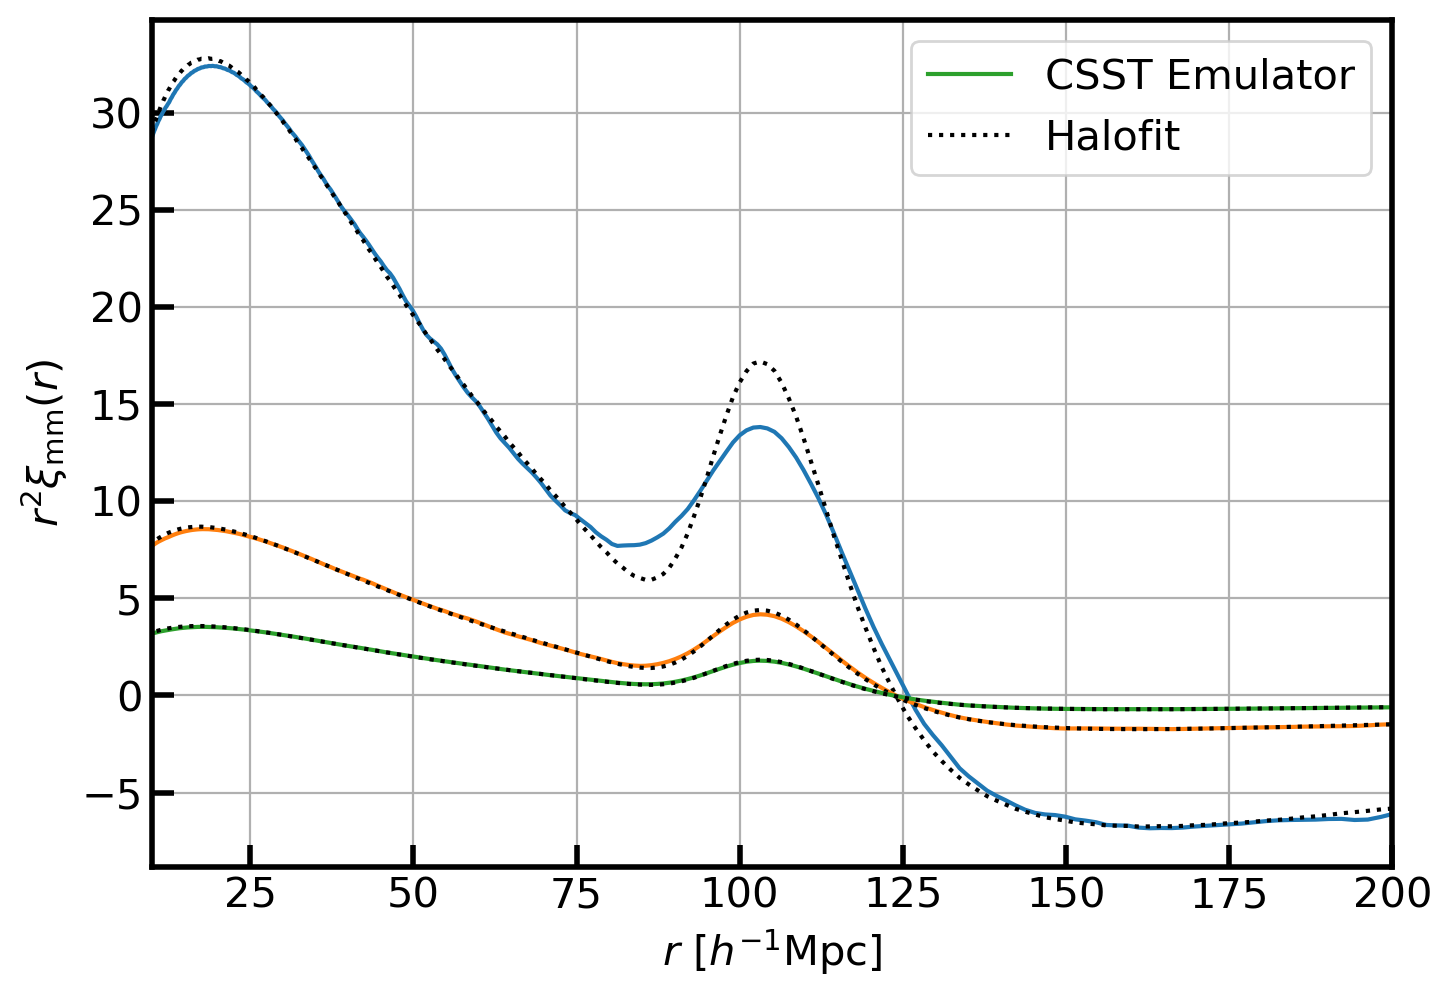

In [4]:
with plt.style.context('article'):
    for iz in range(len(zlist)):
        l0, = plt.plot(rlist, rlist*rlist*ximmnl[iz], label='z={}'.format(zlist[iz]))
        l1, = plt.plot(rlist, rlist*rlist*ximmhf[iz], 'k:')
    plt.legend([l0, l1], ['CSST Emulator', 'Halofit'], loc='upper right')
    plt.xlabel(r'$r\ [h^{-1}\mathrm{Mpc}]$')
    plt.xlim([10, 200])
    plt.ylabel(r'$r^2\xi_{\mathrm{mm}}(r)$')